In [ ]:
# !pip install colour
# !pip install seaborn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Open the file to see
file_path = 'data/fio-daos-test.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

print(df.head())

          Type     bs  bs (Byte)  bs (KiB)  numjobs  perf (MB/s)  \
0  daos-server  8952B       8952  8.742188        2        130.0   
1  daos-server  8952B       8952  8.742188        4        276.0   
2  daos-server  8952B       8952  8.742188        8        356.0   
3  daos-server  8952B       8952  8.742188       16        351.0   
4  daos-server  8952B       8952  8.742188       32        491.0   

   Total writes (GiB)  
0                0.25  
1                0.50  
2                1.00  
3                2.00  
4                4.00  


In [3]:
# Add a Gbps perf column
df['perf-Gbps'] = df['perf (MB/s)'] * 0.008
df['perf-Gbps'].values.max()

np.float64(107.3744)

Text(300, 110, '100 Gbps')

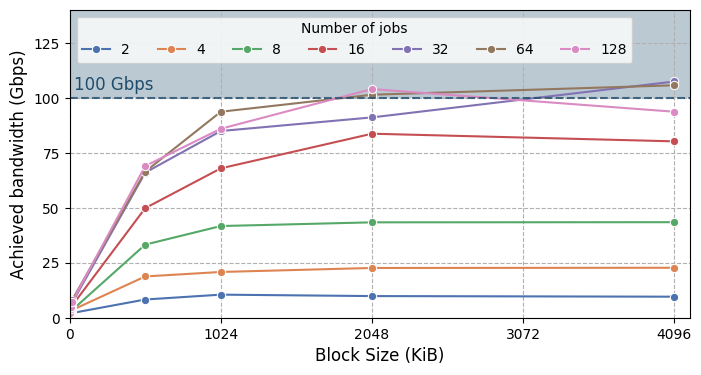

In [17]:
# Create a palette
_palette = sns.color_palette("deep", 7)

plt.figure(figsize=(8, 4))
ymax=135
plt.ylim(bottom=0, top=ymax)
plt.xlim(left=0, right=4200)
ax = sns.lineplot(x='bs (KiB)', y='perf-Gbps', hue='numjobs',\
                    data=df, markers=True, palette=_palette, marker='o')
# ax.set_xscale('log', base=2)  # Set x-axis to log2 scale
plt.xlabel('Block Size (KiB)', fontsize=12)
plt.ylabel('Achieved bandwidth (Gbps)', fontsize=12)
plt.grid(True, which="both", ls="--")

ax.tick_params(bottom=True, left=True)
ax.set_xticks([0, 1024, 2048, 3072, 4096])
ax.set_yticks([0, 25, 50, 75, 100, 125])
plt.legend(title='Number of jobs', loc='upper left', fontsize=10, ncol=7)

# Add a banded area where y > 100
threshold = 100
my_color = '#1F4C6B'
ax.axhspan(threshold, ymax, facecolor=my_color, alpha=0.3)

ax.axhline(y=threshold, color=my_color, linestyle='--', linewidth=1.5, alpha=0.8)

ax.text(300, 110, '100 Gbps', color=my_color, fontsize=12, ha='center', va='top')
